# Visão Computacional com Aprendizado Profundo

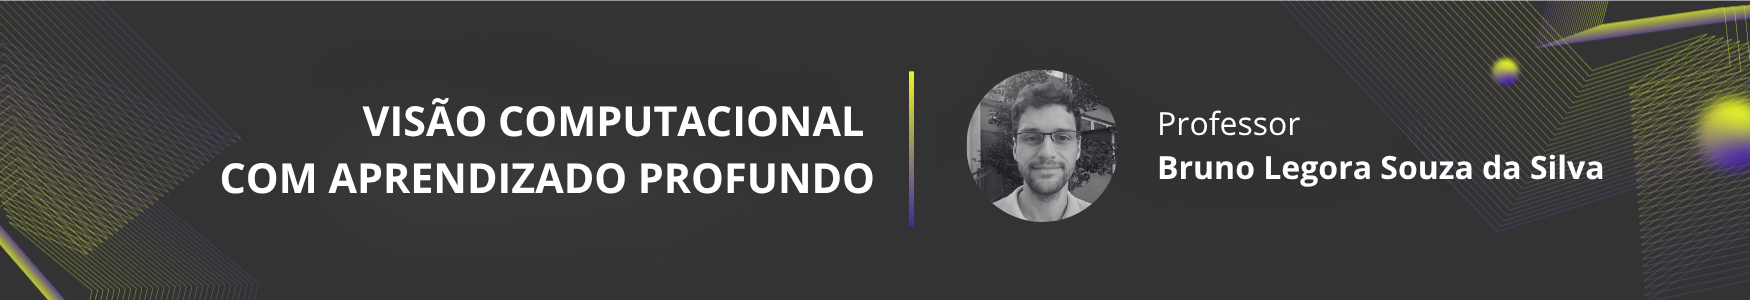

# Exercício Avaliativo nº 3

Esse exercício possui valor de 10 pontos na disciplina. Vocês irão encontrar 3 questões, façam elas nos campos de código indicados, sem remover nenhum campo de texto ou adicionar novos campos de código

### Introdução - Usando GPUs para treinar Redes Neurais

O longo tempo de treinamento de algumas redes neurais (como vocês viram no Laboratório 06) muitas vezes impedia o uso desse tipo de rede e

Porém, com o desenvolvimento das GPUs, foi possível paralelizar o treinamento nesses hardwares, o que acelerou (e muito) o desenvolvimento das inteligências artificiais.

Por sorte, o PyTorch já lida facilmente com dispositivos que possuem (ou não) GPUs dedicadas com a tecnologia CUDA (NVidia) ou ROCm (AMD). Neste exemplo, vamos lidar com GPUs com suporte a CUDA (o Colab já fornece uma GPU deste tipo para nós). Porém, para usarmos, é necessário ativar a opção de GPU.

Vá no menu "Ambiente de Execução" -> "Alterar tipo de ambiente de execução" e altere para o ambiente que usa GPUs. Aguarde reconectar. Ao fazer isso, poderemos acelerar nosso processamento ao configurar o PyTorch.


In [1]:
import torch
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from sklearn.datasets import fetch_olivetti_faces
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')


Se a GPU estiver disponível, a variável device acima retornará o CUDA. Caso contrário, retornará CPU.

Partindo do pressuposto que ela está disponível (você configurou lá em cima), para treinar a rede neural, você deve "enviar" tanto o modelo quanto o conjunto de dados (características e alvos) para o device antes da etapa de treinamento. Isso é feito com o método .to(device):

```python
  model.to(device)
  data.to(device)
```

### Questão nº 01 (5 pts)

Nesta questão, você deve implementar um pipeline completo (desde o carregamento de dados até a classificação do conjunto de teste) com camadas convolucionais, treinando a rede neural usando CUDA. Use a base de dados do Laboratório 06. Se desejar, aproveite as arquiteturas listadas lá.

Porém, você deve desenhar gráficos de:
- Valor da função de perda x época
- Valor de acurácia no conjunto de teste x época

Exemplos desses gráficos podem ser encontrados [aqui](https://private-user-images.githubusercontent.com/118773869/372002294-dc9e3d07-c2ab-4fa8-9054-93b9e5db11e5.png?jwt=eyJhbGciOiJIUzI1NiIsInR5cCI6IkpXVCJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmF3LmdpdGh1YnVzZXJjb250ZW50LmNvbSIsImtleSI6ImtleTUiLCJleHAiOjE3NDgwMzYyOTEsIm5iZiI6MTc0ODAzNTk5MSwicGF0aCI6Ii8xMTg3NzM4NjkvMzcyMDAyMjk0LWRjOWUzZDA3LWMyYWItNGZhOC05MDU0LTkzYjllNWRiMTFlNS5wbmc_WC1BbXotQWxnb3JpdGhtPUFXUzQtSE1BQy1TSEEyNTYmWC1BbXotQ3JlZGVudGlhbD1BS0lBVkNPRFlMU0E1M1BRSzRaQSUyRjIwMjUwNTIzJTJGdXMtZWFzdC0xJTJGczMlMkZhd3M0X3JlcXVlc3QmWC1BbXotRGF0ZT0yMDI1MDUyM1QyMTMzMTFaJlgtQW16LUV4cGlyZXM9MzAwJlgtQW16LVNpZ25hdHVyZT01MGEwOTFkNTcwMTk4OTY2ODdjNGMzOWRhNGI1MDEyMGFhYmI4NWY4OWEzZDQwNGRkNjU2MDYzYTU3MmJlZmZkJlgtQW16LVNpZ25lZEhlYWRlcnM9aG9zdCJ9.FoSbPo-NZnNg-nVuEsz48BIj1TYyRj19behA7uvPpVc) e [aqui](https://private-user-images.githubusercontent.com/118773869/372002385-6e0668b1-10b6-43ad-b5fe-c36aea6969bb.png?jwt=eyJhbGciOiJIUzI1NiIsInR5cCI6IkpXVCJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmF3LmdpdGh1YnVzZXJjb250ZW50LmNvbSIsImtleSI6ImtleTUiLCJleHAiOjE3NDgwMzYyOTEsIm5iZiI6MTc0ODAzNTk5MSwicGF0aCI6Ii8xMTg3NzM4NjkvMzcyMDAyMzg1LTZlMDY2OGIxLTEwYjYtNDNhZC1iNWZlLWMzNmFlYTY5NjliYi5wbmc_WC1BbXotQWxnb3JpdGhtPUFXUzQtSE1BQy1TSEEyNTYmWC1BbXotQ3JlZGVudGlhbD1BS0lBVkNPRFlMU0E1M1BRSzRaQSUyRjIwMjUwNTIzJTJGdXMtZWFzdC0xJTJGczMlMkZhd3M0X3JlcXVlc3QmWC1BbXotRGF0ZT0yMDI1MDUyM1QyMTMzMTFaJlgtQW16LUV4cGlyZXM9MzAwJlgtQW16LVNpZ25hdHVyZT04MTJkNzA1OTNlYWQ4ZTJjZGFjYTk2NzZmZDBiZGU5ZTUwODNiOTY1NWE2OTgyMTY5YzdhYzU3M2M2OGE1Mjk0JlgtQW16LVNpZ25lZEhlYWRlcnM9aG9zdCJ9.np9rhsS14qV9OiFePhLtrRunlI5JqeL7e0xw732Fypc).

O treinamento **deve** resultar em pelo menos 80% de acurácia. Usando GPUs, você conseguirá treinar mais arquiteturas (e/ou testar diferentes parâmetros) mais rapidamente!



Usando dispositivo: cuda
downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
Época 1/20, Perda: 3.7769, Acurácia: 0.0250
Época 2/20, Perda: 3.6945, Acurácia: 0.0250
Época 3/20, Perda: 3.6889, Acurácia: 0.0250
Época 4/20, Perda: 3.6801, Acurácia: 0.0500
Época 5/20, Perda: 3.6379, Acurácia: 0.0625
Época 6/20, Perda: 3.5136, Acurácia: 0.2125
Época 7/20, Perda: 3.1933, Acurácia: 0.4125
Época 8/20, Perda: 2.7357, Acurácia: 0.4250
Época 9/20, Perda: 2.1705, Acurácia: 0.6125
Época 10/20, Perda: 1.6915, Acurácia: 0.6750
Época 11/20, Perda: 1.2799, Acurácia: 0.7250
Época 12/20, Perda: 1.0119, Acurácia: 0.7625
Época 13/20, Perda: 0.7836, Acurácia: 0.8375
Época 14/20, Perda: 0.5420, Acurácia: 0.8750
Época 15/20, Perda: 0.4443, Acurácia: 0.9125
Época 16/20, Perda: 0.3915, Acurácia: 0.9000
Época 17/20, Perda: 0.4035, Acurácia: 0.9000
Época 18/20, Perda: 0.2623, Acurácia: 0.9250
Época 19/20, Perda: 0.1842, Acurácia: 0.9375
Época 20/20, Perda: 0.2

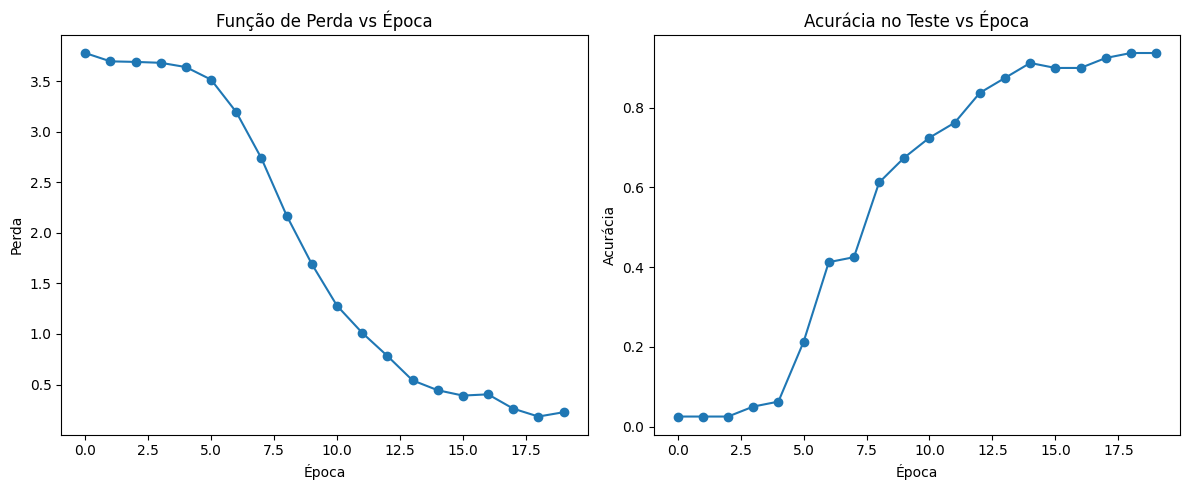

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Usando dispositivo: {device}")

# Carregar dataset Olivetti
data = fetch_olivetti_faces()
X = data.images  # (400, 64, 64)
y = data.target  # (400,)

# Normalizar e redimensionar
X = X.astype(np.float32)
X = np.expand_dims(X, axis=1)  # (400, 1, 64, 64)

# Separar treino/teste (80% treino)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Converter para tensores
X_train_tensor = torch.tensor(X_train)
y_train_tensor = torch.tensor(y_train)
X_test_tensor = torch.tensor(X_test)
y_test_tensor = torch.tensor(y_test)

# Dataloaders
train_ds = TensorDataset(X_train_tensor, y_train_tensor)
test_ds = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=32, shuffle=False)

class SimpleCNN(nn.Module):
    def __init__(self, num_classes=40):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool2 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(64 * 16 * 16, 128)
        self.fc2 = nn.Linear(128, num_classes)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = self.relu(self.conv1(x))  # (B, 32, 64, 64)
        x = self.pool1(x)             # (B, 32, 32, 32)
        x = self.relu(self.conv2(x))  # (B, 64, 32, 32)
        x = self.pool2(x)             # (B, 64, 16, 16)
        x = x.view(x.size(0), -1)     # Flatten
        x = self.dropout(self.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

model = SimpleCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 20
train_losses = []
test_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)

    train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(train_loss)

    # Avaliar acurácia no conjunto de teste
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    acc = correct / total
    test_accuracies.append(acc)
    print(f"Época {epoch+1}/{num_epochs}, Perda: {train_loss:.4f}, Acurácia: {acc:.4f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, marker='o')
plt.title('Função de Perda vs Época')
plt.xlabel('Época')
plt.ylabel('Perda')

plt.subplot(1, 2, 2)
plt.plot(test_accuracies, marker='o')
plt.title('Acurácia no Teste vs Época')
plt.xlabel('Época')
plt.ylabel('Acurácia')

plt.tight_layout()
plt.show()


### Questão nº 02 (2 pts)

Refaça a questão anterior, mas agora com a base de dados MNIST.

In [6]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
# 70000 imagens 28x28 de dígitos (0-9)
images = mnist.data.to_numpy().reshape((-1,28,28))
# o rótulo do dígito (0 a 9)
targets = mnist.target


Usando dispositivo: cuda
Época 1/10, Perda: 0.2209, Acurácia: 0.9802
Época 2/10, Perda: 0.0666, Acurácia: 0.9871
Época 3/10, Perda: 0.0483, Acurácia: 0.9865
Época 4/10, Perda: 0.0390, Acurácia: 0.9889
Época 5/10, Perda: 0.0303, Acurácia: 0.9896
Época 6/10, Perda: 0.0269, Acurácia: 0.9894
Época 7/10, Perda: 0.0215, Acurácia: 0.9909
Época 8/10, Perda: 0.0198, Acurácia: 0.9914
Época 9/10, Perda: 0.0171, Acurácia: 0.9912
Época 10/10, Perda: 0.0146, Acurácia: 0.9912


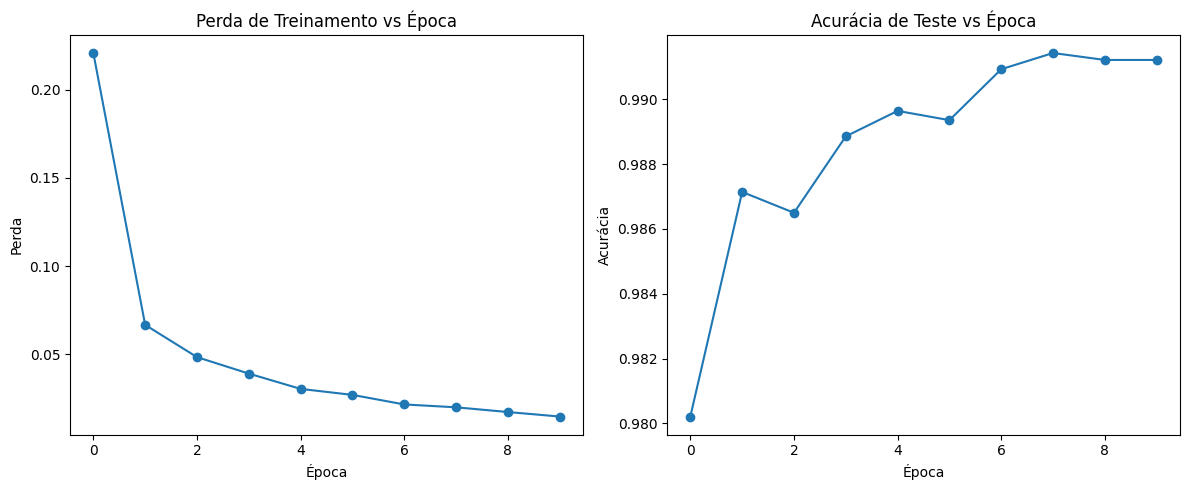

In [7]:
#Faça aqui!
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X = mnist.data.reshape(-1, 1, 28, 28).astype(np.float32) / 255.0  # Normalizar
y = mnist.target.astype(int)  # Convertendo string para int

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Tensores
X_train_tensor = torch.tensor(X_train)
y_train_tensor = torch.tensor(y_train)
X_test_tensor = torch.tensor(X_test)
y_test_tensor = torch.tensor(y_test)

# Datasets e dataloaders
train_ds = TensorDataset(X_train_tensor, y_train_tensor)
test_ds = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=64, shuffle=False)

class MNIST_CNN(nn.Module):
    def __init__(self):
        super(MNIST_CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)  # 28x28 → 28x28
        self.pool1 = nn.MaxPool2d(2)  # 28x28 → 14x14
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)  # 14x14 → 14x14
        self.pool2 = nn.MaxPool2d(2)  # 14x14 → 7x7
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool1(x)
        x = self.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.view(x.size(0), -1)  # Flatten
        x = self.dropout(self.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Usando dispositivo: {device}")

model = MNIST_CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10
train_losses = []
test_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)

    train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(train_loss)

    # Avaliação
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    acc = correct / total
    test_accuracies.append(acc)
    print(f"Época {epoch+1}/{num_epochs}, Perda: {train_loss:.4f}, Acurácia: {acc:.4f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, marker='o')
plt.title("Perda de Treinamento vs Época")
plt.xlabel("Época")
plt.ylabel("Perda")

plt.subplot(1, 2, 2)
plt.plot(test_accuracies, marker='o')
plt.title("Acurácia de Teste vs Época")
plt.xlabel("Época")
plt.ylabel("Acurácia")

plt.tight_layout()
plt.show()


### Questão nº 03 (3 pts)

Redes neurais convolucionais também são "boas" para lidar com dados com informações temporais. A convolução captura informações de vizinhança em imagens, e é capaz de fazer o mesmo em vetores com medições feitas ao longo do tempo. Essa não é uma tarefa de visão computacional, mas mostra uma possibilidade de uso de redes neurais convolucionais!

Um dos conjuntos de dados do United States National Renewable Energy Laboratory representa um índice de irradiância solar em 16 localizações distintas. Cada ponto representa uma medição desse valor, feita a cada 15 minutos.

**A tarefa, neste caso, é prever a irradiação solar em cada um dos pontos a cada 15 minutos, com base nas 2 medições anteriores. Para isso, você deve utilizar uma rede neural convolucional!**

Assim, na entrada você terá a medição atual e a de 15 minutos atrás, e você quer prever a medição de daqui 15 minutos.

O código abaixo pré-processa as séries temporais e as converte em uma matriz com várias amostras de 32 elementos (2 amostras por local), onde cada uma possui targets de tamanho 16 (1 amostra por local).

X possui 22165 linhas por 32 colunas, enquanto Y (alvo) possui a mesma quantidade de linhas e 16 colunas.

Cuidado! Não embaralhe esses dados. Eles estão organizados de forma com que, temporalmente, a segunda amostra ocorreu após a primeira e antes da terceira, e assim sucessivamente. Ao separar entre treino e teste, separe as N últimas amostras como teste sem embaralhar.

Utilize uma rede neural convolucional com camadas unidimensionais [torch.nn.Conv1d](https://docs.pytorch.org/docs/stable/generated/torch.nn.Conv1d.html) para tentar prever esses valores.

Lembre-se, é um problema de regressão (previsão de valores, e não de classes), então sua função de perda não pode ser nada relacionada a métricas de classificação. E os dados, agora, não são 2-D!

Dica: Use o erro quadrático médio para calcular o erro entre a predição e o valor real. Use o [torch.nn.functional.mse_loss](https://docs.pytorch.org/docs/stable/generated/torch.nn.functional.mse_loss.html), que recebe dois tensores e retorna o erro quadrático médio entre elas.

Desenhe também um gráfico da evolução do erro quadrático médio ao longo das épocas, como feito nas questões 1 e 2.

Escolha algumas amostras e faça gráficos comparando o valor previsto com o valor real;




In [9]:
# Você pode ignorar essa célula, ela apenas carrega e pré-processa a base de dados.
# Faça a questão na próxima célula!
import pandas as pd
import datetime

def normalize(df):
    mindf = df.min()
    maxdf = df.max()
    return (df-mindf)/(maxdf-mindf)

def getRollingWindow(index):
    pivot = index
    train_start = pivot.strftime('%Y-%m-%d')
    pivot = pivot + datetime.timedelta(days=20)
    train_end = pivot.strftime('%Y-%m-%d')

    pivot = pivot + datetime.timedelta(days=1)
    validation_start = pivot.strftime('%Y-%m-%d')
    pivot = pivot + datetime.timedelta(days=6)
    validation_end = pivot.strftime('%Y-%m-%d')

    pivot = pivot + datetime.timedelta(days=1)
    test_start = pivot.strftime('%Y-%m-%d')
    pivot = pivot + datetime.timedelta(days=6)
    test_end = pivot.strftime('%Y-%m-%d')

    return train_start, train_end, validation_start, validation_end, test_start, test_end

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

df = pd.read_csv('https://query.data.world/s/wo5wryokqyg5uvbfqqij2mucgwly5u',  parse_dates=['datetime'], index_col=0)
interval = ((df.index >= '2010-06') & (df.index < '2011-06'))
df = df.loc[interval]
df = normalize(df)

# Split data
interval = ((df.index >= '2010-06') & (df.index < '2011-06'))
df = df.loc[interval]

limit = df.index[-1].strftime('%Y-%m-%d')

test_end = ""
index = df.index[0]
batches = []
batches_supervised = []
_order = 2
_step = 1
nobs = _order * len(df.columns)
output_index = -len(df.columns)*_step

while test_end < limit:

    #print("Index: ", index.strftime('%Y-%m-%d'))

    train_start, train_end, validation_start, validation_end, test_start, test_end = getRollingWindow(index)
    index = index + datetime.timedelta(days=7)

    train = df[train_start : train_end]
    validation = df[validation_start : validation_end]
    test = df[test_start : test_end]
    train = pd.concat([train,validation],ignore_index=True)

    if len(batches) == 0:
        batches.append(train)
        train_reshaped_df = series_to_supervised(train,n_in=_order,n_out=_step)
        train_X, train_Y = train_reshaped_df.iloc[:, :nobs].values, train_reshaped_df.iloc[:, output_index:].values
        batches_supervised.append((train_X,train_Y))

    batches.append(test)
    test_reshaped_df = series_to_supervised(test,n_in=_order,n_out=_step)
    test_X, test_Y = test_reshaped_df.iloc[:, :nobs].values, test_reshaped_df.iloc[:, output_index:].values
    batches_supervised.append((test_X,test_Y))

x = []
y = []

for i in range(len(batches_supervised)):
  x.append(batches_supervised[i][0])
  y.append(batches_supervised[i][1])

x = np.concatenate(x)
y = np.concatenate(y)
x_train = x[:17732,:]
y_train = y[:17732,:]
x_test = x[17732:,:]
y_test = y[17732:,:]

Época 1/30, Loss: 0.014596
Época 2/30, Loss: 0.007203
Época 3/30, Loss: 0.007158
Época 4/30, Loss: 0.007126
Época 5/30, Loss: 0.007101
Época 6/30, Loss: 0.007064
Época 7/30, Loss: 0.007031
Época 8/30, Loss: 0.007000
Época 9/30, Loss: 0.006948
Época 10/30, Loss: 0.006918
Época 11/30, Loss: 0.006886
Época 12/30, Loss: 0.006844
Época 13/30, Loss: 0.006816
Época 14/30, Loss: 0.006771
Época 15/30, Loss: 0.006754
Época 16/30, Loss: 0.006737
Época 17/30, Loss: 0.006713
Época 18/30, Loss: 0.006680
Época 19/30, Loss: 0.006656
Época 20/30, Loss: 0.006640
Época 21/30, Loss: 0.006622
Época 22/30, Loss: 0.006607
Época 23/30, Loss: 0.006595
Época 24/30, Loss: 0.006571
Época 25/30, Loss: 0.006556
Época 26/30, Loss: 0.006548
Época 27/30, Loss: 0.006536
Época 28/30, Loss: 0.006530
Época 29/30, Loss: 0.006521
Época 30/30, Loss: 0.006498


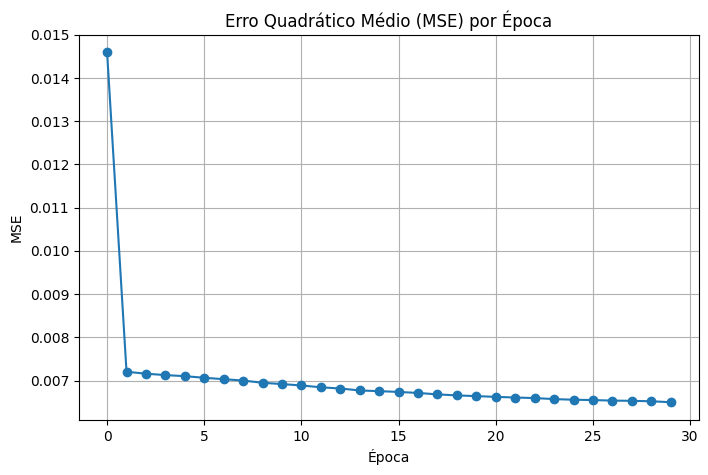

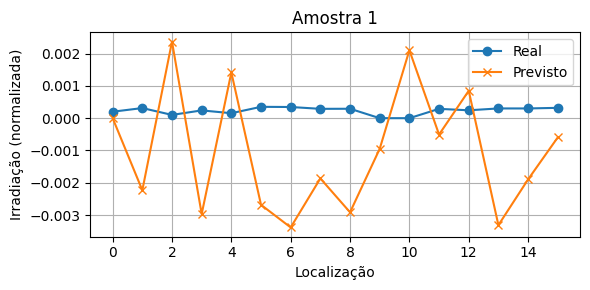

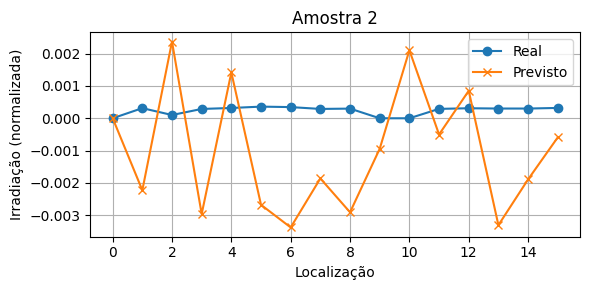

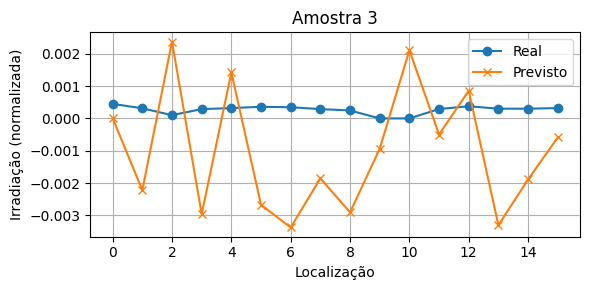

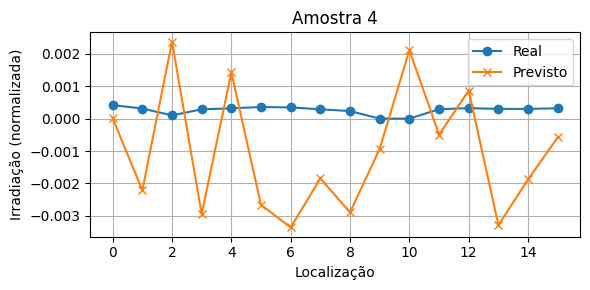

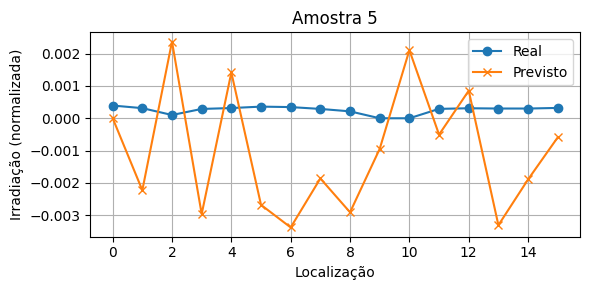

In [ ]:
# Faça aqui
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

# Preparar tensores e reshape para Conv1d: (batch_size, channels=1, sequence_length)
X_train_tensor = torch.tensor(x_train, dtype=torch.float32).unsqueeze(1)  # (N, 1, 32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)              # (N, 16)
X_test_tensor = torch.tensor(x_test, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

train_ds = TensorDataset(X_train_tensor, y_train_tensor)
test_ds = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_ds, batch_size=64, shuffle=False) 
test_loader = DataLoader(test_ds, batch_size=64, shuffle=False)

# Definir modelo CNN
class CNN1DRegressor(nn.Module):
    def __init__(self):
        super(CNN1DRegressor, self).__init__()
        self.conv1 = nn.Conv1d(1, 16, kernel_size=3, padding=1)  # (N, 1, 32) → (N, 16, 32)
        self.conv2 = nn.Conv1d(16, 32, kernel_size=3, padding=1) # (N, 32, 32)
        self.pool = nn.AdaptiveAvgPool1d(8)  # (N, 32, 8)
        self.fc1 = nn.Linear(32 * 8, 64)
        self.fc2 = nn.Linear(64, 16)  # saída: 16 locais

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(x.size(0), -1)  # Flatten
        x = F.relu(self.fc1(x))
        return self.fc2(x)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN1DRegressor().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 30
train_losses = []

# Treinamento
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = F.mse_loss(outputs, targets)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    train_losses.append(epoch_loss)
    print(f"Época {epoch+1}/{num_epochs}, Loss: {epoch_loss:.6f}")


plt.figure(figsize=(8, 5))
plt.plot(train_losses, marker='o')
plt.title('Erro Quadrático Médio (MSE) por Época')
plt.xlabel('Época')
plt.ylabel('MSE')
plt.grid()
plt.show()


model.eval()
with torch.no_grad():
    X_sample = X_test_tensor[:5].to(device)
    y_true = y_test_tensor[:5].cpu().numpy()
    y_pred = model(X_sample).cpu().numpy()

# Plotar comparações
for i in range(5):
    plt.figure(figsize=(6, 3))
    plt.plot(y_true[i], label="Real", marker='o')
    plt.plot(y_pred[i], label="Previsto", marker='x')
    plt.title(f"Amostra {i+1}")
    plt.xlabel("Localização")
    plt.ylabel("Irradiação (normalizada)")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()


